In [12]:
import os
from fastai.vision.all import *
from fastcore.xtras import Path
from fastai.data import *
import fastai
import torch
import json


In [13]:
print(torch.cuda.is_available())

True


In [14]:
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

### **Get all files**

In [16]:
label = 'topphette'
local_path = 'O:\Dataingeniør Bachelor\\6. Semester\DAT255\course-project'
data_path = local_path + '/data/self-collected'
mask_path = data_path + f'/labels/{label}'
image_path = data_path + f'/images'

valid_path = data_path + f'/val/valid.txt'
codes_path = data_path + f'/val/codes.json'

def _get_file_names(path):
    '''
    @param path
    @return list of filenames
    '''
    return [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]


get_msk = lambda o: Path(f'{mask_path}\\{o}')
get_img = lambda o: Path(f'{image_path}\\{o}')

In [17]:
imgs_fns = _get_file_names(image_path)
valid_fns = Path(valid_path).read_text().split('\n')

codes = json.load(open(codes_path)).get(label)

In [18]:
# img_fn = imgs_fns[0]
# mask = PILMask.create(get_msk(img_fn))
# img = PILImage.create(image_path + '/' + img_fn)
# mask.show()
# img.show()
# print(tensor(mask)[0])
# print(mask)

Need binary mask.

-> [random.ipynb](random.ipynb)

Fixed

In [19]:
def _file_splitter(fn):
    '''
    File splitter for self defined validation set
    @param fns: file path to .txt file with image names
    '''
    valid = Path(fn).read_text().split('\n') 
    def _func(x): return x in valid
    def _inner(a, **kawrgs): return FuncSplitter(_func)(a)
    return _inner

In [20]:
linje = DataBlock(blocks=(ImageBlock, MaskBlock(codes)), 
    get_items=_get_file_names, 
    splitter= RandomSplitter(valid_pct=0.2),
    get_y = get_msk,
    get_x = get_img,
    item_tfms=Resize(300, 200),
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats, cuda=True)],)

In [21]:
dls = linje.dataloaders(source=image_path, device=torch.device('cuda'), bs=6)

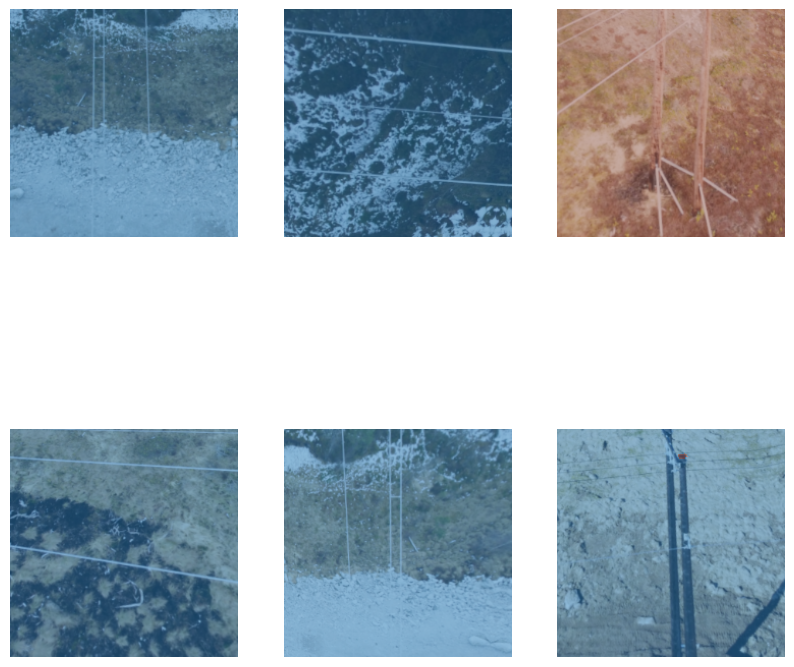

In [22]:
dls.show_batch(figsize=(10, 10))

In [23]:
learn = unet_learner(dls, arch=resnet18, pretrained=True)

In [32]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,time
0,0.031731,9.220228,00:03
1,0.062679,2.859326,00:04
2,0.087221,2.387622,00:03
3,0.137866,1.395493,00:03
4,0.138876,9.819857,00:03
5,0.154678,4.288657,00:03
6,0.173840,3.946120,00:04
7,0.156031,12.077523,00:04
8,0.140354,3.380621,00:04
9,0.130939,2.899536,00:04


In [33]:
preds = learn.get_preds()
p = preds[0][0]

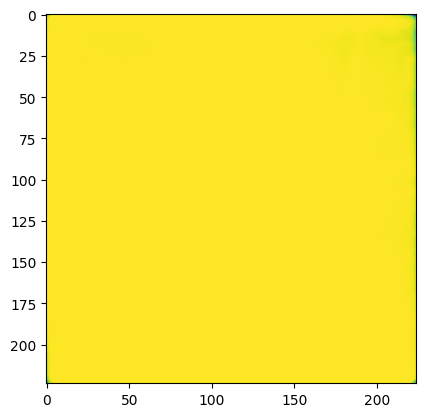

In [34]:
plt.imshow(p[0])

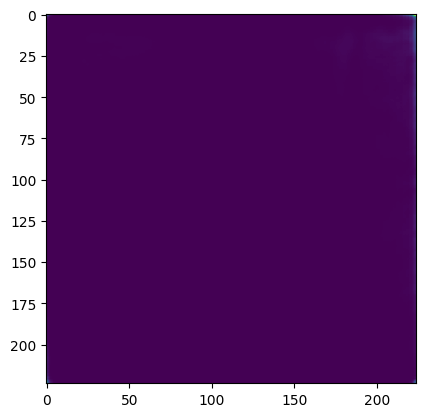

In [35]:
plt.imshow(p[1])

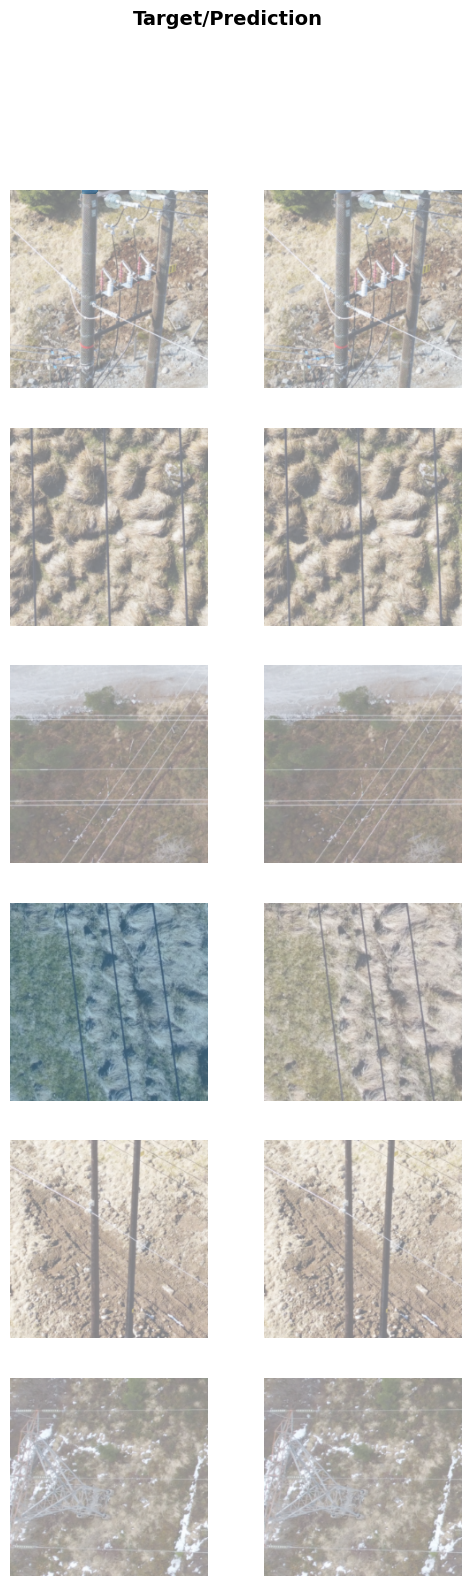

In [38]:
learn.show_results(cmap='Blues', vmin=0, vmax=2)

In [ ]:
setup_cuda(benchmark=True)

In [15]:
torch.cuda.empty_cache()